In [522]:

from pandas import Series, DataFrame, MultiIndex,to_numeric,merge, isnull,date_range, read_csv
import numpy as np

In [8]:
"""

엑셀처럼 만들어 진다.
DataFrame은 이렇게 행과 열로 되어 있는 표 형태이며,
각 열은 Series 형태로 되어 있다.
이때, Series 는 [5,6,7]은 1차원 형태의 배열이다.

"""


dicts = {
    "a" : [5,6,7],  # 얘네 하나하나가 전부 시리즈임.
    "b" : [8,9,10],
    "c" : ['2018','2019','2017']
}

print(type(dicts))
df = DataFrame(dicts,index=[1,2,3])
print(df)

#간단한 정보 제공
df.info()

df

print(df.dtypes)
print("="*50)
print(df.info())
df

<class 'dict'>
   a   b     c
1  5   8  2018
2  6   9  2019
3  7  10  2017
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 3 columns):
a    3 non-null int64
b    3 non-null int64
c    3 non-null object
dtypes: int64(2), object(1)
memory usage: 96.0+ bytes
a     int64
b     int64
c    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 3 columns):
a    3 non-null int64
b    3 non-null int64
c    3 non-null object
dtypes: int64(2), object(1)
memory usage: 96.0+ bytes
None


,a,b,c
1,5,8,2018
2,6,9,2019
3,7,10,2017


In [42]:

dicts = {
    "남학생" : [100,80,180],
    "여학생" : [60,120,180],
    "계" : [160,200,360]
}


test1 = DataFrame(dicts,index=["중학생","고등학생","계"])


test1

dicts2 = {
    "남학생" : [100,80],
    "여학생" : [60,120]
}

test2 = DataFrame(dicts2,index=["중학생", "고등학생"])

test2


# df.loc['six',:] = [2013,'jun',4.0,0.1,2.1]
# test2.loc["계",:] = test2[]

print(test2['남학생'])
print(sum(test2['남학생']))
test2.loc["계",:] = [sum(test2['남학생']),sum(test2['여학생'])]

test2


# df['계'] = [sum(test2['중학생']), sum(test2['고등학생'])]
# print(sum(test2['중학생']))
print("==")
test2.sum(axis=1)
print(test2.sum(axis=1))
test2["계"] = test2.sum(axis=1)

test2

중학생     100
고등학생     80
Name: 남학생, dtype: int64
180
==
중학생     160.0
고등학생    200.0
계       360.0
dtype: float64


,남학생,여학생,계
중학생,100.0,60.0,160.0
고등학생,80.0,120.0,200.0
계,180.0,180.0,360.0


In [46]:


dicts3 = {
    "남학생" : [100,80],
    "여학생" : [60,120]
}

test3 = DataFrame(dicts3,index=["중학생", "고등학생"])

test3

test3.sum()
test3.loc["계",:] = test3.sum()
test3


,남학생,여학생
중학생,100.0,60.0
고등학생,80.0,120.0
계,180.0,180.0


In [50]:



dicts = {
    "a" : [5,6,7],  # 얘네 하나하나가 전부 시리즈임.
    "b" : [8,9,10],
    "c" : ['2018','2019','2017']
}
print(type(dicts))
df = DataFrame(dicts,
              index = [1,2,3])

"""
DataFrame에서 특정 Column만 가져오기
즉 Series를 가져 온다는 뜻이다.

"""

print("type:", type(df["a"])) #Series
print(df["a"])
print(df["b"])

# 여러개의 컬럼을 보기 위해서는 list에 담아서 봐야 한다.
# df["a","b"] => Key Error

idx_list = ["a","b"]
print(df[idx_list])

#축약형으로 a,b,c를 모두 표현
df[["a","b","c"]]


<class 'dict'>
type: <class 'pandas.core.series.Series'>
1    5
2    6
3    7
Name: a, dtype: int64
1     8
2     9
3    10
Name: b, dtype: int64
   a   b
1  5   8
2  6   9
3  7  10


,a,b,c
1,5,8,2018
2,6,9,2019
3,7,10,2017


In [ ]:



vstack - 버츄얼스택 메모리 생성. 
이걸 사용하면 배열이 있으면은 이 배열을 마치 위에서부터 가나다라마 붙일려고 하는거.
반대로하는거 hstack. 나중에 사용

In [67]:

import numpy as np

#난수값을 고정시킴
np.random.seed(0)

df = DataFrame(np.vstack([list('가나다라마'),
    np.round(np.random.rand(3,5),2)]).T,columns=["C1","C2","C3","C4"])
# T를 해주는 이유??
# 가나다라마 구분 안하고 그냥 한꺼번에 들어감. T를 쓰는 이유는 가, 나, 다, 라, 마 따로 구분해주기 위함.
print(df)
print(df["C1"])

# set_index() 를 사용하면 특정 열을 인덱스로 사용되고 기존 인덱스는 사라짐
df = df.set_index("C1")
print(df)
df = df.set_index("C2")
print(df)
### 이걸 보면 기존 인덱스는 사라지고 C2가 새로운 인덱스인 것을 볼 수 있다.

  C1    C2    C3    C4
0  가  0.55  0.65  0.79
1  나  0.72  0.44  0.53
2  다   0.6  0.89  0.57
3  라  0.54  0.96  0.93
4  마  0.42  0.38  0.07
0    가
1    나
2    다
3    라
4    마
Name: C1, dtype: object
      C2    C3    C4
C1                  
가   0.55  0.65  0.79
나   0.72  0.44  0.53
다    0.6  0.89  0.57
라   0.54  0.96  0.93
마   0.42  0.38  0.07
        C3    C4
C2              
0.55  0.65  0.79
0.72  0.44  0.53
0.6   0.89  0.57
0.54  0.96  0.93
0.42  0.38  0.07


In [80]:

########################
###### T안씀 코드 #####
#######################
import numpy as np

#난수값을 고정시킴
np.random.seed(0)

df = DataFrame(np.vstack([list('가나다라마'),np.round(np.random.rand(3,5),2)]))
# T를 해주는 이유??
# 가나다라마 구분 안하고 그냥 한꺼번에 들어감. T를 쓰는 이유는 가, 나, 다, 라, 마 따로 구분해주기 위함.
df
# print(df["C1"])

# # set_index() 를 사용하면 특정 열을 인덱스로 사영되고 기존 인덱스는 사라짐
# df = df.set_index("C1")
# print(df)
# df = df.set_index("C2")
# print(df)
# ### 이걸 보면 기존 인덱스는 사라지고 C2가 새로운 인덱스인 것을 볼 수 있다.

,0,1,2,3,4
0,가,나,다,라,마
1,0.55,0.72,0.6,0.54,0.42
2,0.65,0.44,0.89,0.96,0.38
3,0.79,0.53,0.57,0.93,0.07


In [97]:
"""
MultiIndex를 사용한 DataFrame 만들기
"""

df = DataFrame(
    {
        "a" : [5,6,7],
        "b" : [8,9,10],
        "c" : [11,12,13]
        
    },
    index = MultiIndex.from_tuples(
    [('d',1),('d',2),('e',2)], names = ['n','v']
    )
)

print(df)

print(df.index)


## 일반 자료열로 변경해준다. ******
# 중요한거
# df = df.reset_index()
# 멀티 인덱스 열을 버려 버린다.
df = df.reset_index(drop=True)
# drop=True -> 버려버리겠다.
df

     a   b   c
n v           
d 1  5   8  11
  2  6   9  12
e 2  7  10  13
MultiIndex(levels=[['d', 'e'], [1, 2]],
           labels=[[0, 0, 1], [0, 1, 1]],
           names=['n', 'v'])


,a,b,c
0,5,8,11
1,6,9,12
2,7,10,13


In [99]:
"""
1. column 속성을 사용하기
2. dicts = {
    "a" : [5,6,7],
    "b" : [8,9,10],
    "c" : [11,12,13]
}
을 2차원 데이터 (행렬형태)로 대입한다,

"""

column = ["a","b","c"]

print(type(column))
df = DataFrame([[5,6,7],[8,9,10],[11,12,13]],
    index = [1,2,3],
    columns = column
)
df




<class 'list'>


,a,b,c
1,5,6,7
2,8,9,10
3,11,12,13


In [104]:
# 비교연산자 사용하기
# df.a의 값이 6인 데이터 프레임 가져오기

# b 컬럼에서 10보다 큰거 가져오기.

# print(sp_series[sp_series.values >= 300])
print(df[df>=8])
print("="*50)
print(df["b"]>=10)


df.loc[df['b']>=10,:]

      a     b     c
1   NaN   NaN   NaN
2   8.0   9.0  10.0
3  11.0  12.0  13.0
1    False
2    False
3     True
Name: b, dtype: bool


,a,b,c
3,11,12,13


In [ ]:
강사님 정답

In [106]:
# 지금까지 가능한 이유가 비교연산이 가능하기 때문
# bool로 반환 된다.

df.b > 8

1    False
2     True
3     True
Name: b, dtype: bool

In [107]:
#df.a의 값이 8인 데이터 프레임을 가져오기
print(df[df.a==8])
print("----------")
# b 컬럼에서 10보다 큰거
print(df[df.b > 10])
print("==========")

print(df[df.b > 20])

   a  b   c
2  8  9  10
----------
    a   b   c
3  11  12  13
Empty DataFrame
Columns: [a, b, c]
Index: []


In [109]:
# 중복된 데이터 제거하기
data = {"names" : ["김철수","이철호","김영희","박민수","송철호","김영희"],
       "year" : [2014,2015,2016,2017,2018,2016],
       "points" : [1.5,1.7,3.6,2.4,2.9,3.6]}
df = DataFrame(data)
df

#중복된 데이터를 삭제한다.
df.drop_duplicates()

#적용이 안된 것
df2 = df.drop_duplicates()


#중복된 데이터를 삭제한다.
#inplace = TRUE <<  DF = @!#!@랑 같은거임.
df2.drop_duplicates(inplace=True)
df2



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,names,year,points
0,김철수,2014,1.5
1,이철호,2015,1.7
2,김영희,2016,3.6
3,박민수,2017,2.4
4,송철호,2018,2.9


In [115]:
# Dictionary를 데이터프레임으로 변환
tbl = DataFrame({
    "체중" : [80,70.4,65.5, 45.9, 51.2],
    "신장" : ['170', '180','155','143','154'], #문자열
    "성별" : ["남","여","남","남","여"]
})
tbl


tbl.info()
tbl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
체중    5 non-null float64
신장    5 non-null object
성별    5 non-null object
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


,체중,신장,성별
0,80.0,170,남
1,70.4,180,여
2,65.5,155,남
3,45.9,143,남
4,51.2,154,여


In [119]:
#체중만 출력하시오
print(tbl["체중"])

0    80.0
1    70.4
2    65.5
3    45.9
4    51.2
Name: 체중, dtype: float64


In [144]:
#신장, 체중 출력하시오.
tbl_list = ["신장","체중"]
print(tbl[tbl_list])


방법2 = print(tbl[["신장","체중"]])

    신장    체중
0  170  80.0
1  180  70.4
2  155  65.5
3  143  45.9
4  154  51.2
    신장    체중
0  170  80.0
1  180  70.4
2  155  65.5
3  143  45.9
4  154  51.2


In [ ]:
#남자만 출력하시오

In [ ]:
#여자만 출력하시오

In [536]:
#신장이 155 이상인 사람들을 출력하고 싶은데, 일단 출력해보자
#tbl[tbl.신장 >= 155]
print(tbl)

tbl.dtypes


#object등 -> 정수형으로 변환
# tbl.to_numeric(str)

tbl_신장 = tbl.신장
tbl.신장 = to_numeric(tbl_신장)
# tbl.신장 = tbl_신장.astype(int) < 이것도 됩니다~~~!~!~!~!

#To do

#판다스의 to_numeric 메서드를 사용해서 연산이 필요한 컬럼을 수치형으로 변경해야 한다.
print(tbl[tbl.신장 >= 1500])
tbl.dtypes

     체중   신장 성별
0  80.0  170  남
1  70.4  180  여
2  65.5  155  남
3  45.9  143  남
4  51.2  154  여
Empty DataFrame
Columns: [체중, 신장, 성별]
Index: []


체중    float64
신장      int64
성별     object
dtype: object

In [135]:
# 데이터프레임의 값 (내용)
df2.values

array([['김철수', 2014, 1.5],
       ['이철호', 2015, 1.7],
       ['김영희', 2016, 3.6],
       ['박민수', 2017, 2.4],
       ['송철호', 2018, 2.9]], dtype=object)

In [136]:
# 인덱스 이름 변경
df2.index.name = "Num"
#컬럼 이름 변경
df2.columns.name = "Info"
df2

Info,names,year,points
Num,,,
0,김철수,2014,1.5
1,이철호,2015,1.7
2,김영희,2016,3.6
3,박민수,2017,2.4
4,송철호,2018,2.9


In [139]:
# 데이터프레임으로 변환
# columns : 컬럼목록
# index : 인덱스 목록
# NaN : Not a Number


# 중복된 데이터 제거하기
data = {"names" : ["김철수","이철호","김영희","박민수","송철호"],
       "year" : [2014,2015,2016,2017,2018],
       "points" : [1.5,1.7,3.6,2.4,2.9]}
df = DataFrame(data)

print(data)
df = DataFrame(data, columns = ["year","names","points","penalty"],\
              index = ["one","two","three","four","five"])
df

{'names': ['김철수', '이철호', '김영희', '박민수', '송철호'], 'year': [2014, 2015, 2016, 2017, 2018], 'points': [1.5, 1.7, 3.6, 2.4, 2.9]}


,year,names,points,penalty
one,2014,김철수,1.5,NaN
two,2015,이철호,1.7,NaN
three,2016,김영희,3.6,NaN
four,2017,박민수,2.4,NaN
five,2018,송철호,2.9,NaN


In [143]:
#컬럼 목록
df.columns

Index(['year', 'names', 'points', 'penalty'], dtype='object')

In [151]:
# 데이터프레임["필드명"] = 값

df2["penalty"] = np.arange(5)
df2

Info,names,year,points,penalty
Num,,,,
0,김철수,2014,1.5,0
1,이철호,2015,1.7,1
2,김영희,2016,3.6,2
3,박민수,2017,2.4,3
4,송철호,2018,2.9,4


In [ ]:

numpy - arange

In [159]:
# 새로운 컬럼 추가
ar = np.arange(1,6)
print(type(ar))
print(ar.shape)
print(ar.ndim)
print(ar)
print(len(ar))
df["ages"] = np.arange(10,15)
df

<class 'numpy.ndarray'>
(5,)
1
[1 2 3 4 5]
5


,year,names,points,penalty,ages
one,2014,김철수,1.5,0.7,10
two,2015,이철호,1.7,0.7,11
three,2016,김영희,3.6,0.7,12
four,2017,박민수,2.4,0.7,13
five,2018,송철호,2.9,0.7,14


In [160]:
# 컬럼 삭제
del df["ages"]
df

,year,names,points,penalty
one,2014,김철수,1.5,0.7
two,2015,이철호,1.7,0.7
three,2016,김영희,3.6,0.7
four,2017,박민수,2.4,0.7
five,2018,송철호,2.9,0.7


In [161]:
# 데이터 프레임의 인덱스를 변경
df2 = DataFrame(data, index=["one","two","three","four","five"])
df2

,names,year,points
one,김철수,2014,1.5
two,이철호,2015,1.7
three,김영희,2016,3.6
four,박민수,2017,2.4
five,송철호,2018,2.9


In [163]:
# [start:end-1]
df2[0:4]
# 인덱스 기준으로 잡네. 행단위

,names,year,points
one,김철수,2014,1.5
two,이철호,2015,1.7
three,김영희,2016,3.6
four,박민수,2017,2.4


In [164]:
df2.loc["two"]

names      이철호
year      2015
points     1.7
Name: two, dtype: object

In [165]:
df3 = df2.loc["two":"four"] #two ~ four 행 선택
df3

,names,year,points
two,이철호,2015,1.7
three,김영희,2016,3.6
four,박민수,2017,2.4


In [166]:
#
# loc[행범위, 열범위]
# start:end, : => 전체
df2.loc[ :, ["year","names"]]


,year,names
one,2014,김철수
two,2015,이철호
three,2016,김영희
four,2017,박민수
five,2018,송철호


In [167]:
# loc
# iloc - 숫자 인덱스 사용
print(df2)
print(df2.iloc[3]) # 3번 행 - 숫자 인덱스 사용
print(df2.loc["four"]) # 문자열 인덱스 사용

      names  year  points
one     김철수  2014     1.5
two     이철호  2015     1.7
three   김영희  2016     3.6
four    박민수  2017     2.4
five    송철호  2018     2.9
names      박민수
year      2017
points     2.4
Name: four, dtype: object
names      박민수
year      2017
points     2.4
Name: four, dtype: object


In [170]:
print(df2)
# iloc [행범위, 열범위] start:end=>start ~ end-1
df2.iloc[3:5,0:2]


      names  year  points
one     김철수  2014     1.5
two     이철호  2015     1.7
three   김영희  2016     3.6
four    박민수  2017     2.4
five    송철호  2018     2.9


,names,year
four,박민수,2017
five,송철호,2018


In [169]:
df2.iloc[ : , 1:4] #전체행, 1~3컬럼

,year,points
one,2014,1.5
two,2015,1.7
three,2016,3.6
four,2017,2.4
five,2018,2.9


In [177]:
# year 가 2016보다 큰 행만 선택, loc를 사용해서 연산

print(df2.loc[df2["year"]>2016])



df2[(df2['year']==2017) | (df2['year'] == 2018)]

     names  year  points
four   박민수  2017     2.4
five   송철호  2018     2.9


,names,year,points
four,박민수,2017,2.4
five,송철호,2018,2.9


In [263]:

dicts = {
    "남학생" : [100,80,180],
    "여학생" : [60,120,180],
    "계" : [160,200,360]
}


test1 = DataFrame(dicts,index=["중학생","고등학생","계"])


test1

dicts2 = {
    "남학생" : [100,80],
    "여학생" : [60,120]
}

test2 = DataFrame(dicts2,index=["중학생", "고등학생"])

test2


# df.loc['six',:] = [2013,'jun',4.0,0.1,2.1]
# test2.loc["계",:] = test2[]

print(test2['남학생'])
print(sum(test2['남학생']))
test2.loc["계",:] = [sum(test2['남학생']),sum(test2['여학생'])]

test2


# df['계'] = [sum(test2['중학생']), sum(test2['고등학생'])]
# print(sum(test2['중학생']))
print("==")
test2.sum(axis=1)
print(test2.sum(axis=1))
test2["계"] = test2.sum(axis=1)

test2

중학생     100
고등학생     80
Name: 남학생, dtype: int64


TypeError: 'DataFrame' object is not callable

In [ ]:

A = 학생이 남학생인 사건
B = 학생이 여학생인 사건
C = 학생이 중학생인 사건
D = 학생이 고등학생인 사건
이라고 했을 때, 아래의 확률을 계산한다

1. 학생을 뽑았을 때, 남학생일 확률 공식) P(A) = P(A|X) : 동전의 앞면이 나올 확률이 50%이다. 
    동전이 앞면이 떨어지는걸 봤따면, 이 정보를 X라고 하고 표시하고 앞면이 나올 확률을 1.0으로, 뒷면이 나올 확률을 0.0으로 부여한다.

    
P(A) = 180/360 = 0.5

2. 학생을 뽑았을 때, 고등학생이면서 남학생일 확률 P(A∩D) = 80/360
3. 고등학생중 한명을 뽑았을 때, 남학생일 확률 P(A|D) = 80/200 =P(A∩D)/P(D) = 
    (80/360) / (200/360) = 80/200 = 0.4
    
    

In [214]:
test2.index
test2[["남학생","계"]]

test2.loc[["중학생"],["계"]]

listtest = list()

sum = test2.loc[["계"],["계"]]
sum = sum.astype(int)
sumval = sum.values[0]
print(sumval)
print(type(sumval))
print(sum)
man = test2.loc[["계"],["남학생"]]
man = man.astype(int)
manval = man.values[0]
print(type(manval))

print(man)

print(manval / sumval)
# tbl.신장 = tbl_신장.astype(int) < 이것도 됩니다~~~!~!~!~!


[360]
<class 'numpy.ndarray'>
     계
계  360
<class 'numpy.ndarray'>
   남학생
계  180
[0.5]


In [ ]:


강사님 정답


In [447]:


# 문제 1) 학생을 뽑았을 때, 남학생일 확률 구하기  반반이다.

df

#  iloc (행,열)

A = df.iloc[2,1]

print(A)

D = df.iloc[2,2]

print(D)

print("P(A)",A/D)

# 문제 2) 교집합으로 고등학생이면서 남핵생일 확률 구화기  P(A∩D)

df.iloc[1,0]

A = df.iloc[1,0]/D

print(A)

# 문제 3) 고등학생 중 한명을 뽑았을 때, 남학생일 확률 P(A|D) = P(A∩D)/P(D)




print(df.iloc[1,0]/df.iloc[1,2])




-1.6210874964712072
-0.5816729970873883
P(A) 2.7869395770277805
-1.2278785915041759
0.4566348969922385


In [728]:
# 결측치
"""
- 결측값이 있는지 여부 확인 : isnull(), notnull()
- 열별 결측값 개수 : df.isnull().sum()
- 행별 결측값 개수 : df.isnull().sum(1)
"""

#step1 결측치가 있는 데이터 만들기

df_left = DataFrame({"KEY" : ['Key0', 'Key1', 'Key2', 'Key3'],\
                    '사용자' : ['김길동', '이순자', '왕서방', '좀하자'],\
                    '치수' : [0.5, 2.2, 3.6, 0.4]})

df_right = DataFrame({'KEY' : ['Key2','Key3','Key4','Key5'],\
                     'CType' : ['C2','C3','C4','C5'],\
                     'DType' : ['D2','D3','D4','D5']})


# merge
df_all = merge(df_left, df_right, how='outer', on='KEY')
# outer = outerjoin


df_all

# ix를 사용해서 특정 컬럼에 값 입력하기
# ix[인덱스,컬럼명] = 값
# df.ix[2,'C2'] = np.nan

df_all.loc[5,'사용자']='이수일'
df_all.loc[0,'DType']='D0'
df_all

,KEY,사용자,치수,CType,DType
0,Key0,김길동,0.5,NaN,D0
1,Key1,이순자,2.2,NaN,NaN
2,Key2,왕서방,3.6,C2,D2
3,Key3,좀하자,0.4,C3,D3
4,Key4,NaN,NaN,C4,D4
5,Key5,이수일,NaN,C5,D5


In [231]:
# isnull() 메소드는 관측치가 결측이면 True, 결측이 아니면 False의 boolean값을 반환합니다.
isnull(df_all)
df_all.isnull()

,KEY,사용자,치수,CType,DType
0,False,False,False,True,False
1,False,False,False,True,True
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,True,False,False
5,False,False,True,False,False


In [237]:
# 컬럼별 결측값 개수 구하기 : df.isnull().sum()
print(df_all)
df_all.isnull().sum()
#sum(1) <- row단위
df_all.isnull().sum(1)

    KEY  사용자   치수 CType DType
0  Key0  김길동  0.5   NaN    D0
1  Key1  이순자  2.2   NaN   NaN
2  Key2  왕서방  3.6    C2    D2
3  Key3  좀하자  0.4    C3    D3
4  Key4  NaN  NaN    C4    D4
5  Key5  이수일  NaN    C5    D5


0    1
1    2
2    0
3    0
4    2
5    1
dtype: int64

In [257]:
# pre_sale.describe(include = [np.object])
print(df_all)
df_all.dtypes
# 숫자형 요약
df_all.describe()
#정수형만
df_all.describe(include=[np.object])
#정수가 아닌 오브젝트인 애들만 요약을 해서 출력

### summary 랑 비슷한 개념

    KEY  사용자   치수 CType DType
0  Key0  김길동  0.5     0    D0
1  Key1  이순자  2.2     0     0
2  Key2  왕서방  3.6    C2    D2
3  Key3  좀하자  0.4    C3    D3
4  Key4    0  0.0    C4    D4
5  Key5  이수일  0.0    C5    D5


,KEY,사용자,CType,DType
count,6,6,6,6
unique,6,6,5,6
top,Key0,왕서방,0,D2
freq,1,1,2,1


In [254]:
%matplotlib inline
!pip install missingno



In [248]:
import matplotlib as mpl
from matplotlib import font_manager,rc

#한글 처리를 위한 폰트 설정
font_name = font_manager.FontProperties(\
    fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

#그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

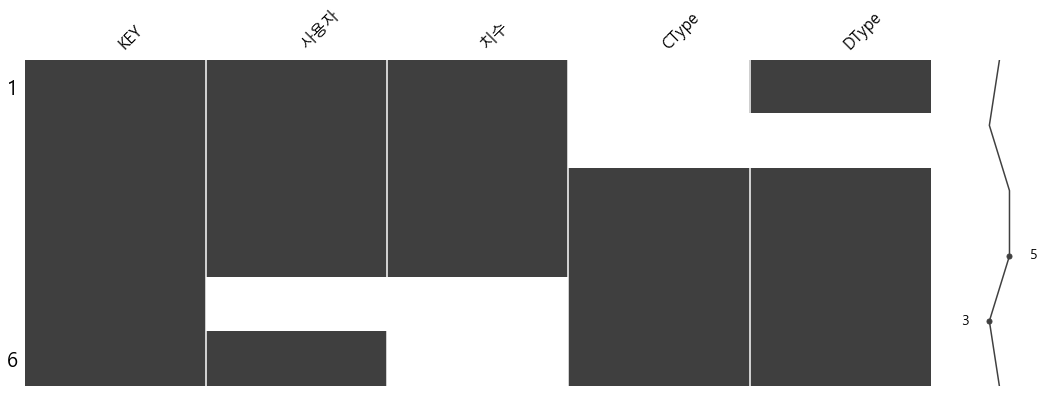

In [255]:
#결측치 보기
import missingno as msno
msno.matrix(df_all, figsize=(18,6))

In [268]:

#전체 컬럼으로 변경하기
# df_all = df_all.fillna(0)
#특정 컬럼으로 변경하기
df_all
#한번해보기
#결측값을 특정 값으로 채우기 (replace missing vlaues with scalar value) : df.fillna(0)

df_all["치수"] = df_all["치수"].fillna(0)
df_all

,KEY,사용자,치수,CType,DType
0,Key0,김길동,0.5,NaN,D0
1,Key1,이순자,2.2,NaN,NaN
2,Key2,왕서방,3.6,C2,D2
3,Key3,좀하자,0.4,C3,D3
4,Key4,NaN,0.0,C4,D4
5,Key5,이수일,0.0,C5,D5


In [269]:
#전체 컬럼으로 변경하기
df_all = df_all.fillna(0)
#presale_describe(include=[np.object])
print(df_all)
df_all.describe(include=[np.object])

    KEY  사용자   치수 CType DType
0  Key0  김길동  0.5     0    D0
1  Key1  이순자  2.2     0     0
2  Key2  왕서방  3.6    C2    D2
3  Key3  좀하자  0.4    C3    D3
4  Key4    0  0.0    C4    D4
5  Key5  이수일  0.0    C5    D5


,KEY,사용자,CType,DType
count,6,6,6,6
unique,6,6,5,6
top,Key0,왕서방,0,D2
freq,1,1,2,1


In [283]:

#step1 결측치가 있는 데이터 만들기

df_left = DataFrame({"KEY" : ['Key0', 'Key1', 'Key2', 'Key3'],\
                    '사용자' : ['김길동', '이순자', '왕서방', '좀하자'],\
                    '치수' : [0.5, 2.2, 3.6, 0.4]})

df_right = DataFrame({'KEY' : ['Key2','Key3','Key4','Key5'],\
                     'CType' : ['C2','C3','C4','C5'],\
                     'DType' : ['D2','D3','D4','D5']})


# merge
df_all = merge(df_left, df_right, how='outer', on='KEY')
# outer = outerjoin

df_all


#ix를 사용해서 특정 컬럼에 값 입력하기
# ix[인덱스, 컬럼명] = 값
# df.ix[2,'C2'] = np.nan
df_all.loc[4,"사용자"]='김길동'
df_all.loc[5,"사용자"]='김길동'
df_all.loc[0,"Dtype"]='D2'   
print(df_all)
df_all.describe(include=[np.object])

    KEY  사용자   치수 CType DType Dtype
0  Key0  김길동  0.5   NaN   NaN    D2
1  Key1  이순자  2.2   NaN   NaN   NaN
2  Key2  왕서방  3.6    C2    D2   NaN
3  Key3  좀하자  0.4    C3    D3   NaN
4  Key4  김길동  NaN    C4    D4   NaN
5  Key5  김길동  NaN    C5    D5   NaN


,KEY,사용자,CType,DType,Dtype
count,6,6,4,4,1
unique,6,4,4,4,1
top,Key0,김길동,C4,D4,D2
freq,1,3,1,1,1


In [281]:
# R에서 SUMMARY 번외편

# 같은 값을 갖고 있는 걸로 사용자별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
df_all['사용자'].value_counts()

김길동    3
왕서방    1
이순자    1
좀하자    1
Name: 사용자, dtype: int64

In [ ]:
#결측값 제거 하기 연습을 하기 위한 새로운 데이터

In [286]:
#결측값 제거 하기 연습
import warnings
warnings.filterwarnings('ignore')

df = DataFrame(np.random.randn(5,4), columns = ['C1','C2','C3','C4'])

#결측값 입력해보기
df.ix[[0,1], 'C1'] =None
df.ix[2,'C2'] = np.nan

df

,C1,C2,C3,C4
0,NaN,1.395472,1.787484,-0.569517
1,NaN,-0.462506,-1.085801,0.639736
2,-0.385863,NaN,0.995711,-1.933205
3,0.248531,-0.031245,-0.139474,-0.190656
4,0.448638,-0.992430,-0.225940,-1.654571


In [289]:
#결측값이 들어있는 행 전체 삭제하기 (delete row with NaN) : df.dropna(axis=0)
# 혹은 결측값이 들어있는 열 전체 (axis=1) 삭제

#1. 행 전체 삭제하기

df_drop_row = df.dropna(axis=0)
df_drop_row


,C1,C2,C3,C4
3,0.248531,-0.031245,-0.139474,-0.190656
4,0.448638,-0.992430,-0.225940,-1.654571


In [290]:
#열 전체 삭제
df_drop_column = df.dropna(axis=1)
df_drop_column

,C3,C4
0,1.787484,-0.569517
1,-1.085801,0.639736
2,0.995711,-1.933205
3,-0.139474,-0.190656
4,-0.225940,-1.654571


In [292]:
# 데이터프레임 생성
df = DataFrame({
    "weight" : [80,70.4,65.5,45.9,51.2],
    "height" : [170,180,155,143,154]
})
df

,weight,height
0,80.0,170
1,70.4,180
2,65.5,155
3,45.9,143
4,51.2,154


In [293]:
# 세로방향 합계 (각 컬럼의 합계)
df.sum(axis=0)

weight    313.0
height    802.0
dtype: float64

In [295]:
#가로방향 합계 (각 행의 합계)
df.sum(axis=1)

0    250.0
1    250.4
2    220.5
3    188.9
4    205.2
dtype: float64

In [302]:
rDate = date_range(start='1-1-2019', periods = 20)
rDate

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20'],
              dtype='datetime64[ns]', freq='D')

In [304]:
# 6행 4열의 랜덤 숫자 생성
df = DataFrame(np.random.randn(6,4))
df
print(df.shape) # shape의 크기
df

(6, 4)


,0,1,2,3
0,0.197643,0.413900,1.197322,1.883354
1,0.714224,2.284333,1.564103,0.611104
2,-0.877363,-1.621087,-0.581673,-0.537834
3,-1.556024,-0.054465,-1.811279,-0.631175
4,-0.928159,1.490722,0.195499,-0.471604
5,1.812355,-2.294137,0.651209,-1.130496


In [306]:
#컬럼 이름 지정
df.columns=["A","B","C","D"]
#인덱스 이름 지정
#date_range("시작날짜", 옵션)
df.index = date_range("20180301", periods=6)
df.index
df

,A,B,C,D
2018-03-01,0.197643,0.413900,1.197322,1.883354
2018-03-02,0.714224,2.284333,1.564103,0.611104
2018-03-03,-0.877363,-1.621087,-0.581673,-0.537834
2018-03-04,-1.556024,-0.054465,-1.811279,-0.631175
2018-03-05,-0.928159,1.490722,0.195499,-0.471604
2018-03-06,1.812355,-2.294137,0.651209,-1.130496


In [310]:
rDate = date_range(start="20180301", end="20180416")
rDate

rDate = date_range(start="20180301", end="20180416", freq='10H')
rDate


DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 10:00:00',
               '2018-03-01 20:00:00', '2018-03-02 06:00:00',
               '2018-03-02 16:00:00', '2018-03-03 02:00:00',
               '2018-03-03 12:00:00', '2018-03-03 22:00:00',
               '2018-03-04 08:00:00', '2018-03-04 18:00:00',
               ...
               '2018-04-12 02:00:00', '2018-04-12 12:00:00',
               '2018-04-12 22:00:00', '2018-04-13 08:00:00',
               '2018-04-13 18:00:00', '2018-04-14 04:00:00',
               '2018-04-14 14:00:00', '2018-04-15 00:00:00',
               '2018-04-15 10:00:00', '2018-04-15 20:00:00'],
              dtype='datetime64[ns]', length=111, freq='10H')

(3485, 5)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 5 columns):
지역명        3485 non-null object
규모구분       3485 non-null object
연도         3485 non-null int64
월          3485 non-null int64
분양가격(㎡)    3289 non-null object
dtypes: int64(2), object(3)
memory usage: 136.2+ KB
지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    196
dtype: int64


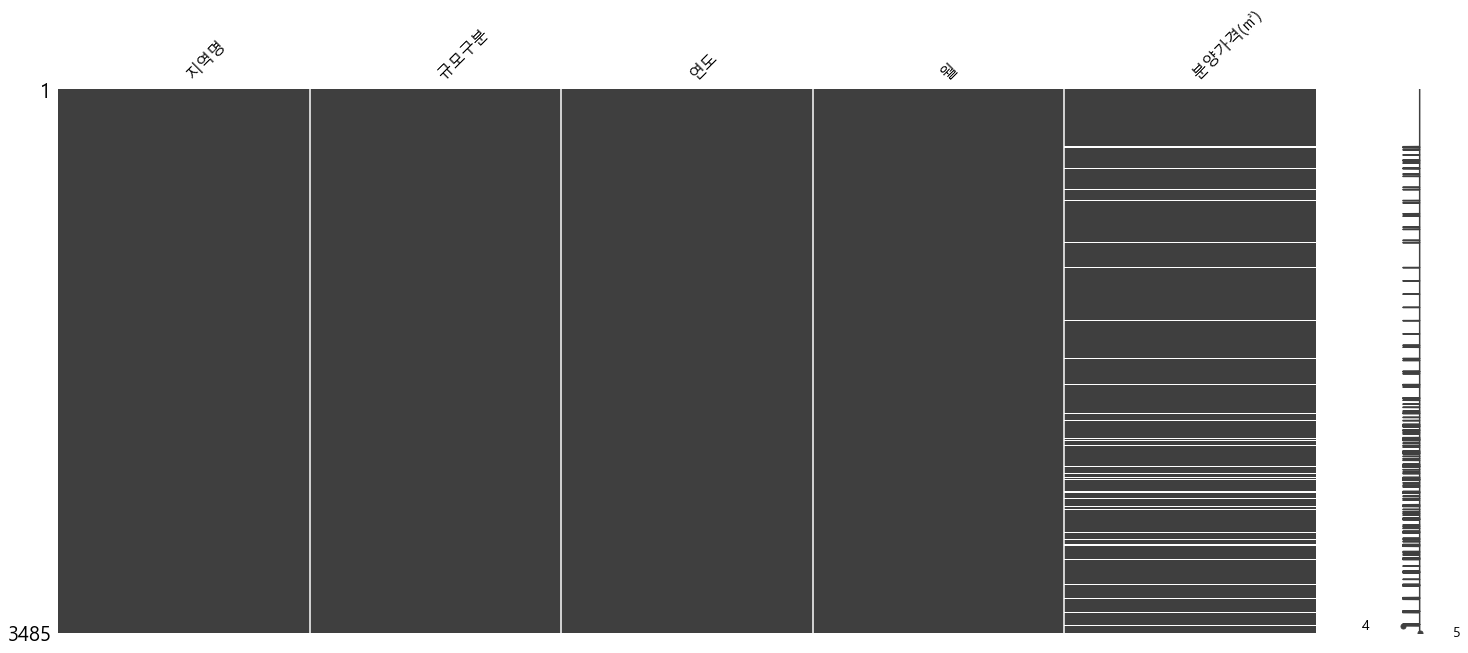

In [632]:
# 판다스로 csv파일 읽어 들이기



aptData = read_csv('C:\\Users\\daily\\Desktop\\jupiter_workspace\\2019_apt.csv', encoding="cp949")

print(aptData.shape)
aptData.head()

aptData.tail()
print("="*50)

print(type(aptData))
print("="*50)

aptData.info()
print("="*50)


import missingno as msno

msno.matrix(aptData)

print(aptData.isnull().sum(axis = 0))

# print(aptData.isnull().sum(axis = 1))


#null값 196



In [686]:
#문제1) 데이터에서 특정 컬럼만 가져 와보시오.
# 지역명,분양가격 20개만 가져와서 출력하기   =>  여러개의 컬럼을 보기 위해서는 list에 담아서 봐야 한다.

aptData.loc[ :20, ["지역명","분양가격(㎡)"]]
# print(aptData[["지역명","분양가격"]])
print(aptData[["지역명",aptData.columns[4]]].head(20))
print(aptData[["지역명",aptData.columns[4]]][:20])


   지역명 분양가격(㎡)
0   서울    5841
1   서울    5652
2   서울    5882
3   서울    5721
4   서울    5879
5   인천    3163
6   인천    3488
7   인천    3119
8   인천    3545
9   인천    3408
10  경기    3138
11  경기    3126
12  경기    3239
13  경기    3496
14  경기    3680
15  부산    3112
16  부산    2950
17  부산    2999
18  부산    2957
19  부산    3500
   지역명 분양가격(㎡)
0   서울    5841
1   서울    5652
2   서울    5882
3   서울    5721
4   서울    5879
5   인천    3163
6   인천    3488
7   인천    3119
8   인천    3545
9   인천    3408
10  경기    3138
11  경기    3126
12  경기    3239
13  경기    3496
14  경기    3680
15  부산    3112
16  부산    2950
17  부산    2999
18  부산    2957
19  부산    3500


In [383]:
# 문제 2) 지역명, 규모구분 을 출력 하되 인덱스가 10 ~ 30 까지를 모두 출력하시오.
# 여러 행 출력
# loc[행리스트,열리스트]

aptData.loc[ 10:30, ["지역명","규모구분"]]

,지역명,규모구분
10,경기,전체
11,경기,전용면적 60㎡이하
12,경기,전용면적 60㎡초과 85㎡이하
13,경기,전용면적 85㎡초과 102㎡이하
14,경기,전용면적 102㎡초과
15,부산,전체
16,부산,전용면적 60㎡이하
17,부산,전용면적 60㎡초과 85㎡이하
18,부산,전용면적 85㎡초과 102㎡이하
19,부산,전용면적 102㎡초과


In [437]:
# 문제 3 경기,광주,대구만 출력하시오.
# - loc를 사용해서 출력하시오.


a = aptData.loc[(aptData['지역명']=="경기") | (aptData['지역명']=="광주") | (aptData['지역명']=="대구")]
print(a)
a.loc[:,"지역명"]

     지역명               규모구분    연도   월 분양가격(㎡)
10    경기                 전체  2015  10    3138
11    경기         전용면적 60㎡이하  2015  10    3126
12    경기   전용면적 60㎡초과 85㎡이하  2015  10    3239
13    경기  전용면적 85㎡초과 102㎡이하  2015  10    3496
14    경기        전용면적 102㎡초과  2015  10    3680
20    대구                 전체  2015  10    2682
21    대구         전용면적 60㎡이하  2015  10    2614
22    대구   전용면적 60㎡초과 85㎡이하  2015  10    2696
23    대구  전용면적 85㎡초과 102㎡이하  2015  10    2557
24    대구        전용면적 102㎡초과  2015  10    2598
25    광주                 전체  2015  10    2420
26    광주         전용면적 60㎡이하  2015  10    2253
27    광주   전용면적 60㎡초과 85㎡이하  2015  10    2439
28    광주  전용면적 85㎡초과 102㎡이하  2015  10        
29    광주        전용면적 102㎡초과  2015  10        
95    경기                 전체  2015  11    3098
96    경기         전용면적 60㎡이하  2015  11    3079
97    경기   전용면적 60㎡초과 85㎡이하  2015  11    3202
98    경기  전용면적 85㎡초과 102㎡이하  2015  11    3391
99    경기        전용면적 102㎡초과  2015  11    3724
105   대구                 전체  2015 

10      경기
11      경기
12      경기
13      경기
14      경기
20      대구
21      대구
22      대구
23      대구
24      대구
25      광주
26      광주
27      광주
28      광주
29      광주
95      경기
96      경기
97      경기
98      경기
99      경기
105     대구
106     대구
107     대구
108     대구
109     대구
110     광주
111     광주
112     광주
113     광주
114     광주
        ..
3325    경기
3326    경기
3327    경기
3328    경기
3329    경기
3335    대구
3336    대구
3337    대구
3338    대구
3339    대구
3340    광주
3341    광주
3342    광주
3343    광주
3344    광주
3410    경기
3411    경기
3412    경기
3413    경기
3414    경기
3420    대구
3421    대구
3422    대구
3423    대구
3424    대구
3425    광주
3426    광주
3427    광주
3428    광주
3429    광주
Name: 지역명, Length: 615, dtype: object

In [688]:
#문제 4) 경기도에서 2019년도만 출력하기.

print(aptData.loc[(aptData['지역명']=="경기") & (aptData["연도"]==2019)])

#논리연산 ==
# aptData.지역명=="경기"
# == 은 논리연산이므로 트루펄스만나옴.

     지역명               규모구분    연도  월 분양가격(㎡)
3325  경기                 전체  2019  1    4258
3326  경기         전용면적 60㎡이하  2019  1    4440
3327  경기   전용면적 60㎡초과 85㎡이하  2019  1    4216
3328  경기  전용면적 85㎡초과 102㎡이하  2019  1    4905
3329  경기        전용면적 102㎡초과  2019  1    4931
3410  경기                 전체  2019  2    4256
3411  경기         전용면적 60㎡이하  2019  2    4444
3412  경기   전용면적 60㎡초과 85㎡이하  2019  2    4216
3413  경기  전용면적 85㎡초과 102㎡이하  2019  2    5018
3414  경기        전용면적 102㎡초과  2019  2    4945


In [727]:
#문제5 평당 분양가격을 더해서 총 컬럼이 6개가 되도록  출력하시오.
# 평당분양가격  = 분양가격 * 3.3  이다.

import re
aptData = read_csv('C:\\Users\\daily\\Desktop\\jupiter_workspace\\2019_apt.csv', encoding="cp949")

# b = aptData.dropna(axis=0)
# print(b)

# b =  b.loc[b["분양가격(㎡)"]=="  ","분양가격(㎡)"]= None

# print(b)

# c = aptData[aptData['분양가격(㎡)'] =="  "]
# print(c)

aptData.loc[aptData['분양가격(㎡)']== "  ", '분양가격(㎡)'] = None
#aptData.loc[aptData['분양가격(㎡)']==("".join(re.findall("[0-9][,][0-9]","".join([x for x in aptData['분양가격(㎡)'].values])))) , '분양가격(㎡)'].replace(",","")


print(aptData["분양가격(㎡)"])
# print(aptData)

# aptData["분양가격(㎡)"] = aptData["분양가격(㎡)"].astype(float)

# aptData["분양가격(㎡)"] = aptData["분양가격(㎡)"].astype(float)


# aptData.fillna(vaue= "  ")

0       5841
1       5652
2       5882
3       5721
4       5879
5       3163
6       3488
7       3119
8       3545
9       3408
10      3138
11      3126
12      3239
13      3496
14      3680
15      3112
16      2950
17      2999
18      2957
19      3500
20      2682
21      2614
22      2696
23      2557
24      2598
25      2420
26      2253
27      2439
28      None
29      None
        ... 
3455    2571
3456    2487
3457    2550
3458    2657
3459    2729
3460    2386
3461    2666
3462    2372
3463    3052
3464    2753
3465    2412
3466    2274
3467    2404
3468    2337
3469    2887
3470    2652
3471    2486
3472    2636
3473    2667
3474    2989
3475    2932
3476    2887
3477    2909
3478    3173
3479    3703
3480    3424
3481    3804
3482    3504
3483    3226
3484    2952
Name: 분양가격(㎡), Length: 3485, dtype: object


In [ ]:
##성대 정답

In [713]:



aptData = read_csv('C:\\Users\\daily\\Desktop\\jupiter_workspace\\2019_apt.csv', encoding="cp949")

# aptData = read_csv("2019_apt.csv",encoding="euc-kr")
# aptData["분양가격(㎡)"].
l = [str(x).strip() for x in aptData["분양가격(㎡)"].values] #str float
aptData["분양가격"]=l
a=[]
for x in l:
    x = x.replace(",","")
    if(x==""):
        x=0
    x = float(x)*3.3
    a.append(x)
aptData["평당분양가격"]=a
aptData

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879,19400.7
5,인천,전체,2015,10,3163,3163,10437.9
6,인천,전용면적 60㎡이하,2015,10,3488,3488,11510.4
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119,3119,10292.7
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545,3545,11698.5
9,인천,전용면적 102㎡초과,2015,10,3408,3408,11246.4


In [ ]:
#문제 6)  aptData 에서 규모분포가 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있도록 출력 하시오.

In [714]:
aptData["규모구분"].value_counts()
aptData.groupby("규모구분").count().지역명

전용면적 60㎡이하           697
전용면적 102㎡초과          697
전용면적 85㎡초과 102㎡이하    697
전체                   697
전용면적 60㎡초과 85㎡이하     697
Name: 규모구분, dtype: int64

In [ ]:
판다스 na처리
https://translate.googleusercontent.com/translate_c?depth=1&hl=ko&rurl=translate.google.com&sl=auto&sp=nmt4&tl=ko&u=https://github.com/pandas-dev/pandas/issues/1450&xid=17259,15700022,15700186,15700190,15700253,15700256,15700259&usg=ALkJrhjLcoY-byU5iHYNp4AtMwka4XB0XA
        
        
        